In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
%matplotlib inline
# 한글폰트 사용
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

In [2]:
df = pd.read_csv('./data/서울시 코로나19 확진자 현황.csv ', sep=',', encoding='euc-kr')
df.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,8966,11.30.,NaN,NaN,NaN,강북구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
1,8965,11.30.,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
2,8964,11.30.,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
3,8963,11.30.,NaN,NaN,NaN,영등포구,NaN,서초구 사우나 관련,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
4,8962,11.30.,NaN,NaN,NaN,영등포구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y


In [3]:
soco = df[['확진일','지역','여행력','접촉력','상태','이동경로']]
soco.tail()

,확진일,지역,여행력,접촉력,상태,이동경로
8961,1.31.,성북구,NaN,#5 접촉,퇴원,이동경로 공개기간 경과
8962,1.30.,마포구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과
8963,1.30.,종로구,NaN,#3 접촉,퇴원,이동경로 공개기간 경과
8964,1.30.,중랑구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과
8965,1.24.,강서구,중국 우한시,해외 접촉,퇴원,이동경로 공개기간 경과


In [4]:
# nan값 공백으로 변경
soco = soco.fillna(' ')
soco.head()

,확진일,지역,여행력,접촉력,상태,이동경로
0,11.30.,강북구,,감염경로 조사중,,
1,11.30.,타시도,,기타 확진자 접촉,,
2,11.30.,타시도,,감염경로 조사중,,
3,11.30.,영등포구,,서초구 사우나 관련,,
4,11.30.,영등포구,,감염경로 조사중,,


In [5]:
soco['상태'] = soco['상태'].map(lambda s: s.replace(' ', '치료'))
soco['여행력'] = soco['여행력'].map(lambda s: s.replace(' ', '없음'))
soco

,확진일,지역,여행력,접촉력,상태,이동경로
0,11.30.,강북구,없음,감염경로 조사중,치료,
1,11.30.,타시도,없음,기타 확진자 접촉,치료,
2,11.30.,타시도,없음,감염경로 조사중,치료,
3,11.30.,영등포구,없음,서초구 사우나 관련,치료,
4,11.30.,영등포구,없음,감염경로 조사중,치료,
...,...,...,...,...,...,...
8961,1.31.,성북구,없음,#5 접촉,퇴원,이동경로 공개기간 경과
8962,1.30.,마포구,중국없음우한시,해외 접촉,퇴원,이동경로 공개기간 경과
8963,1.30.,종로구,없음,#3 접촉,퇴원,이동경로 공개기간 경과
8964,1.30.,중랑구,중국없음우한시,해외 접촉,퇴원,이동경로 공개기간 경과


In [6]:
# soco.to_excel('./results/서울시코로나확진자.xlsx')

In [7]:
soco['확진일'] = pd.to_datetime(soco['확진일'].map(lambda s: '2020.'+ s))

In [8]:
soco.head()

,확진일,지역,여행력,접촉력,상태,이동경로
0,2020-11-30,강북구,없음,감염경로 조사중,치료,
1,2020-11-30,타시도,없음,기타 확진자 접촉,치료,
2,2020-11-30,타시도,없음,감염경로 조사중,치료,
3,2020-11-30,영등포구,없음,서초구 사우나 관련,치료,
4,2020-11-30,영등포구,없음,감염경로 조사중,치료,


In [9]:
soco['여행'] = soco.apply(lambda s: 0 if s.여행력 == '없음' else 1, axis=1)
soco.head()

,확진일,지역,여행력,접촉력,상태,이동경로,여행
0,2020-11-30,강북구,없음,감염경로 조사중,치료,,0
1,2020-11-30,타시도,없음,기타 확진자 접촉,치료,,0
2,2020-11-30,타시도,없음,감염경로 조사중,치료,,0
3,2020-11-30,영등포구,없음,서초구 사우나 관련,치료,,0
4,2020-11-30,영등포구,없음,감염경로 조사중,치료,,0


In [10]:
soco['확진'] = 1
soco.head()

,확진일,지역,여행력,접촉력,상태,이동경로,여행,확진
0,2020-11-30,강북구,없음,감염경로 조사중,치료,,0,1
1,2020-11-30,타시도,없음,기타 확진자 접촉,치료,,0,1
2,2020-11-30,타시도,없음,감염경로 조사중,치료,,0,1
3,2020-11-30,영등포구,없음,서초구 사우나 관련,치료,,0,1
4,2020-11-30,영등포구,없음,감염경로 조사중,치료,,0,1


In [11]:
soco_11 = soco[soco['확진일'].dt.strftime('%m') == '11']
soco_11

,확진일,지역,여행력,접촉력,상태,이동경로,여행,확진
0,2020-11-30,강북구,없음,감염경로 조사중,치료,,0,1
1,2020-11-30,타시도,없음,기타 확진자 접촉,치료,,0,1
2,2020-11-30,타시도,없음,감염경로 조사중,치료,,0,1
3,2020-11-30,영등포구,없음,서초구 사우나 관련,치료,,0,1
4,2020-11-30,영등포구,없음,감염경로 조사중,치료,,0,1
...,...,...,...,...,...,...,...,...
2905,2020-11-01,도봉구,없음,동대문구 에이스희망케어센터 관련,퇴원,이동경로 공개기간 경과,0,1
2906,2020-11-01,마포구,없음,타시도 확진자 접촉,퇴원,이동경로 공개기간 경과,0,1
2907,2020-11-01,강남구,없음,서울음악 교습 관련,퇴원,이동경로 공개기간 경과,0,1
2908,2020-11-01,강남구,없음,기타 확진자 접촉,퇴원,이동경로 공개기간 경과,0,1


## 서울시 인구현황 데이터

In [12]:
pop = pd.read_csv('./cctv/서울시 인구.tsv', sep='\t', header=2)
pop.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.3/4,합계,"4,405,833","9,953,009","4,840,912","5,112,097","9,699,232","4,719,170","4,980,062","253,777","121,742","132,035",2.20,"1,552,356"
1,2020.3/4,종로구,"74,861","159,842","77,391","82,451","149,952","73,024","76,928","9,890","4,367","5,523",2.00,"28,396"
2,2020.3/4,중구,"63,594","135,321","66,193","69,128","125,800","61,526","64,274","9,521","4,667","4,854",1.98,"24,265"
3,2020.3/4,용산구,"112,451","244,953","119,074","125,879","229,786","110,604","119,182","15,167","8,470","6,697",2.04,"39,995"
4,2020.3/4,성동구,"136,096","302,695","147,582","155,113","295,591","144,444","151,147","7,104","3,138","3,966",2.17,"45,372"


In [13]:
del pop['기간']
del pop['세대']
del pop['남자']
del pop['남자.1']
del pop['남자.2']
del pop['여자']
del pop['여자.1']
del pop['여자.2']
del pop['세대당인구']
pop.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [14]:
pop.rename({'자치구': '구별', '계': '인구수', '계.1': '내국인', '계.2': '외국인',
            '65세이상고령자': '고령자'}, inplace=True, axis=1)
pop.head()

,구별,인구수,내국인,외국인,고령자
0,합계,"9,953,009","9,699,232","253,777","1,552,356"
1,종로구,"159,842","149,952","9,890","28,396"
2,중구,"135,321","125,800","9,521","24,265"
3,용산구,"244,953","229,786","15,167","39,995"
4,성동구,"302,695","295,591","7,104","45,372"


In [15]:
pop['인구수'] = pop['인구수'].map(lambda s: int(s.replace(',','')))
pop['내국인'] = pop['내국인'].map(lambda s: int(s.replace(',','')))
pop['외국인'] = pop['외국인'].map(lambda s: int(s.replace(',','')))
pop['고령자'] = pop['고령자'].map(lambda s: int(s.replace(',','')))
pop.head()

,구별,인구수,내국인,외국인,고령자
0,합계,9953009,9699232,253777,1552356
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372


In [16]:
pop.drop([0], inplace= True)
pop.head()

,구별,인구수,내국인,외국인,고령자
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372
5,광진구,361923,348064,13859,50047


In [17]:
# 외국인 비율 & 고령자 비율 추가 
pop['외국인비율'] = pop['외국인'] / pop['인구수'] * 100
pop['고령자비율'] = pop['고령자'] / pop['인구수'] * 100
pop.head()

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율
1,종로구,159842,149952,9890,28396,6.187360,17.765043
2,중구,135321,125800,9521,24265,7.035863,17.931437
3,용산구,244953,229786,15167,39995,6.191800,16.327622
4,성동구,302695,295591,7104,45372,2.346917,14.989346
5,광진구,361923,348064,13859,50047,3.829268,13.828079


In [18]:
# 인구수 기준 정렬(내림차순)
pop.sort_values(by='인구수', ascending=False).head()

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율
24,송파구,676673,670331,6342,92149,0.937233,13.617951
16,강서구,589536,583544,5992,88052,1.016393,14.935814
23,강남구,544085,539235,4850,73942,0.891405,13.590156
11,노원구,529532,525486,4046,84612,0.764071,15.978638
21,관악구,514555,498574,15981,78206,3.105790,15.198764


### 서울 코로나 확진자 수 데이터 피봇(pivot_table)

In [19]:
soco_pv = pd.pivot_table(soco, index='지역', columns='확진일', values='확진', aggfunc='count')
soco_pv = soco_pv.fillna(0)
soco_pv.head()

확진일,2020-01-24,2020-01-30,2020-01-31,2020-02-02,2020-02-05,2020-02-06,2020-02-07,2020-02-16,2020-02-19,2020-02-20,...,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30
지역,,,,,,,,,,,,,,,,,,,,,
강남구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,9.0,5.0,17.0,14.0,11.0,5.0,8.0,6.0,12.0,12.0
강동구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,4.0,5.0,4.0,5.0,2.0,3.0,5.0,2.0,5.0
강북구,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.0,0.0,4.0,5.0,1.0,1.0,2.0,8.0,4.0
강서구,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,4.0,6.0,9.0,58.0,56.0,23.0,15.0,15.0,15.0
경기도,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


#### 데이터 프레임에서 문자열 타입을 변경
- 데이터 프레임에서 데이터 타입 바꾸는 방법
- 1. astype()을 사용(ex. DataFrame.astype(int또는 float)) : 모든 열의 데이터 타입을 변경
- 2. astype(ex. {'컬럼명': int 또는 float})  : 특정 컬럼이 데이터 타입을 변경
- 3. float 값을 반올림하여 int로 변경(ex. DataFrame.round(0).astype(int)) :  float 수를 0에 가깝게 반올림
- 4. Pandas에서float를int로 변환하는to_numeric()메소드(ex. pd.to_numeric(DataFrame, downcast='integer'))
: 이 방법은 숫자가 아닌 유형 (예 : 문자열)을 적합한 숫자 유형으로 안전하게 변환하는 기능을 제공

In [20]:
# 소수를 정수로 변경
soco_pv = soco_pv.astype('int')
soco_pv.head()

확진일,2020-01-24,2020-01-30,2020-01-31,2020-02-02,2020-02-05,2020-02-06,2020-02-07,2020-02-16,2020-02-19,2020-02-20,...,2020-11-21,2020-11-22,2020-11-23,2020-11-24,2020-11-25,2020-11-26,2020-11-27,2020-11-28,2020-11-29,2020-11-30
지역,,,,,,,,,,,,,,,,,,,,,
강남구,0,0,0,0,0,0,0,0,0,1,...,9,5,17,14,11,5,8,6,12,12
강동구,0,0,0,0,0,0,0,0,0,0,...,6,4,5,4,5,2,3,5,2,5
강북구,0,0,0,0,0,0,0,0,0,0,...,2,1,0,4,5,1,1,2,8,4
강서구,1,0,0,0,0,0,0,0,0,0,...,2,4,6,9,58,56,23,15,15,15
경기도,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [21]:
# soco_pv.to_excel('./results/서울시코로나확진자테이블.xlsx')

In [22]:
# []로 만들시 values값이 인덱스로 표시(ex. [index='확진일']..)
soco_pv1 = pd.pivot_table(soco, index='확진일', columns='지역', values='확진', aggfunc='count')
soco_pv1 = soco_pv1.fillna(0)
soco_pv1 = soco_pv1.astype('int')
soco_pv1.head()

지역,강남구,강동구,강북구,강서구,경기도,관악구,광진구,구로구,금천구,기타,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,타시도
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-24,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2020-01-31,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,2,0,0,0
2020-02-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2020-02-05,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [23]:
del soco_pv1['경기도']
del soco_pv1['기타']
del soco_pv1['타시도']
soco_pv1['합계'] = soco_pv1.sum(axis=1)
soco_pv1.tail()

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,합계
확진일,,,,,,,,,,,,,,,,,,,,,
2020-11-26,5,2,1,56,8,1,7,4,11,3,...,4,10,14,5,6,2,2,2,11,189
2020-11-27,8,3,1,23,9,1,5,3,7,3,...,3,10,17,5,7,5,4,0,11,169
2020-11-28,6,5,2,15,3,6,7,2,13,5,...,7,6,11,5,2,4,1,3,8,150
2020-11-29,12,2,8,15,7,3,3,6,13,4,...,4,5,11,5,4,8,1,2,5,148
2020-11-30,12,5,4,15,7,5,5,2,7,7,...,7,7,10,14,3,3,0,1,4,145


### 서울 코로나 확진자 수 데이터 그룹화(groupby)

#### 지역별 확진자수

In [24]:
soco_gu = soco.groupby(['지역'])[['확진']].count()
soco_gu.head()

,확진
지역,
강남구,520
강동구,277
강북구,200
강서구,604
경기도,1


In [25]:
soco_gu00 = soco.groupby(['지역'])[['확진']].count()
soco_gu00.head()

,확진
지역,
강남구,520
강동구,277
강북구,200
강서구,604
경기도,1


In [26]:
soco.head(3)

,확진일,지역,여행력,접촉력,상태,이동경로,여행,확진
0,2020-11-30,강북구,없음,감염경로 조사중,치료,,0,1
1,2020-11-30,타시도,없음,기타 확진자 접촉,치료,,0,1
2,2020-11-30,타시도,없음,감염경로 조사중,치료,,0,1


In [27]:
soco_gu01 = soco.groupby(['지역'])[['확진','여행']].sum()
soco_gu01.head()

,확진,여행
지역,,
강남구,520,56
강동구,277,23
강북구,200,3
강서구,604,19
경기도,1,0


In [28]:
soco_gu01['여행자감염율'] = soco_gu01['확진'] / soco_gu01['여행'] * 100
soco_gu01.head()

,확진,여행,여행자감염율
지역,,,
강남구,520,56,928.571429
강동구,277,23,1204.347826
강북구,200,3,6666.666667
강서구,604,19,3178.947368
경기도,1,0,inf


###  int 제거
- .replace([np.inf, -np.inf], np.nan)

In [29]:
soco_gu01['여행자감염율'] = soco_gu01['여행자감염율'].replace([np.inf, -np.inf], np.nan) #int를 nan값으로 변경함
soco_gu01['여행자감염율'] = soco_gu01['여행자감염율'].fillna(0.0)
soco_gu01.head()

,확진,여행,여행자감염율
지역,,,
강남구,520,56,928.571429
강동구,277,23,1204.347826
강북구,200,3,6666.666667
강서구,604,19,3178.947368
경기도,1,0,0.000000


In [30]:
# 지역 인덱스를 다시 컬럼으로 넣음
soco_gu00 = soco_gu00.reset_index()
soco_gu00.head()

,지역,확진
0,강남구,520
1,강동구,277
2,강북구,200
3,강서구,604
4,경기도,1


#### 확진일별 지역의 확진자수

In [31]:
soco_gu1 = soco.groupby(['지역','확진일'])[['확진']].count()
soco_gu1.head()

확진
지역  확진일           
강남구 2020-02-20   1
    2020-02-26   2
    2020-02-27   2
    2020-02-28   2
    2020-02-29   1

In [32]:
soco_gu1 = soco_gu1.reset_index()
soco_gu1

,지역,확진일,확진
0,강남구,2020-02-20,1
1,강남구,2020-02-26,2
2,강남구,2020-02-27,2
3,강남구,2020-02-28,2
4,강남구,2020-02-29,1
...,...,...,...
3136,타시도,2020-11-26,14
3137,타시도,2020-11-27,4
3138,타시도,2020-11-28,8
3139,타시도,2020-11-29,11


### 지역별 상태

In [33]:
soco_gu2 = soco.groupby(['지역','상태'])[['확진']].sum()
soco_gu2.head()

확진
지역  상태     
강남구 사망    4
    치료  126
    퇴원  390
강동구 사망    1
    치료   56

In [34]:
soco_gu2 = soco_gu2.reset_index()
soco_gu2.head()

,지역,상태,확진
0,강남구,사망,4
1,강남구,치료,126
2,강남구,퇴원,390
3,강동구,사망,1
4,강동구,치료,56


In [35]:
soco_gu2.head()

,지역,상태,확진
0,강남구,사망,4
1,강남구,치료,126
2,강남구,퇴원,390
3,강동구,사망,1
4,강동구,치료,56


In [36]:
soco_gu3 = soco_gu2.groupby(['상태'])[['확진']].mean()
soco_gu3.head()

,확진
상태,
사망,3.720000
치료,80.464286
퇴원,245.185185


### 11월 지역별 확진자수

In [37]:
soco_11_g = soco_11.groupby(['지역'])[['확진']].sum()
soco_11_g.head()

,확진
지역,
강남구,163
강동구,73
강북구,41
강서구,299
경기도,1


### 월별, 구별 확진자 수 구하기

### resample 연산
- resample('M') 메서드는 월 단위로 데이터를 모음(2018-01-31)
- 인덱스는 해당 월의 마지막 일자로 표시되는데 시작일로 변경하고 싶다면 resample('MS')로 'S' 옵션을 추가하면 인덱스가 해당 월의 첫 번째 일자로 변경(2018-01-01)
- resample('W') 주단위

In [38]:
socogo = soco_pv1.resample('M').sum()
socogo

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,합계
확진일,,,,,,,,,,,,,,,,,,,,,
2020-01-31,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,3,0,1,7
2020-02-29,8,4,0,1,4,1,1,1,8,0,...,2,12,1,2,0,7,8,0,0,73
2020-03-31,36,6,5,20,30,5,33,11,12,6,...,12,15,17,18,12,14,3,5,12,369
2020-04-30,21,3,0,4,9,2,1,0,3,3,...,9,10,3,5,6,7,2,1,3,143
2020-05-31,11,11,9,20,16,6,6,3,8,10,...,5,11,6,11,20,7,3,3,3,216
2020-06-30,7,11,10,33,59,3,45,17,13,43,...,4,7,43,29,12,18,3,3,14,435
2020-07-31,15,14,4,25,27,5,5,7,6,2,...,9,44,0,7,4,11,6,8,11,268
2020-08-31,89,94,85,115,109,74,60,34,191,73,...,244,161,80,69,48,121,37,31,104,2248
2020-09-30,82,42,31,64,136,34,32,20,60,69,...,47,80,31,54,21,65,23,8,41,1179


### socogo의 인덱스값을 월로 변경

In [39]:
socogo.index = ['1월','2월','3월','4월','5월','6월','7월','8월','9월','10월','11월']
socogo

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,합계
1월,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,3,0,1,7
2월,8,4,0,1,4,1,1,1,8,0,...,2,12,1,2,0,7,8,0,0,73
3월,36,6,5,20,30,5,33,11,12,6,...,12,15,17,18,12,14,3,5,12,369
4월,21,3,0,4,9,2,1,0,3,3,...,9,10,3,5,6,7,2,1,3,143
5월,11,11,9,20,16,6,6,3,8,10,...,5,11,6,11,20,7,3,3,3,216
6월,7,11,10,33,59,3,45,17,13,43,...,4,7,43,29,12,18,3,3,14,435
7월,15,14,4,25,27,5,5,7,6,2,...,9,44,0,7,4,11,6,8,11,268
8월,89,94,85,115,109,74,60,34,191,73,...,244,161,80,69,48,121,37,31,104,2248
9월,82,42,31,64,136,34,32,20,60,69,...,47,80,31,54,21,65,23,8,41,1179
10월,88,19,15,22,86,11,22,5,33,22,...,17,61,13,18,21,18,7,7,21,651


In [40]:
socogo_T = socogo.T
socogo_T

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월
지역,,,,,,,,,,,
강남구,0,8,36,21,11,7,15,89,82,88,163
강동구,0,4,6,3,11,11,14,94,42,19,73
강북구,0,0,5,0,9,10,4,85,31,15,41
강서구,1,1,20,4,20,33,25,115,64,22,299
관악구,0,4,30,9,16,59,27,109,136,86,71
광진구,0,1,5,2,6,3,5,74,34,11,45
구로구,0,1,33,1,6,45,5,60,32,22,72
금천구,0,1,11,0,3,17,7,34,20,5,27
노원구,0,8,12,3,8,13,6,191,60,33,144


In [41]:
socogo_T['합계'] = socogo_T.sum(axis=1)
socogo_T

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계
지역,,,,,,,,,,,,
강남구,0,8,36,21,11,7,15,89,82,88,163,520
강동구,0,4,6,3,11,11,14,94,42,19,73,277
강북구,0,0,5,0,9,10,4,85,31,15,41,200
강서구,1,1,20,4,20,33,25,115,64,22,299,604
관악구,0,4,30,9,16,59,27,109,136,86,71,547
광진구,0,1,5,2,6,3,5,74,34,11,45,186
구로구,0,1,33,1,6,45,5,60,32,22,72,277
금천구,0,1,11,0,3,17,7,34,20,5,27,125
노원구,0,8,12,3,8,13,6,191,60,33,144,478


In [42]:
socogo_T = socogo_T.iloc[:-1, :]
socogo_T

,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,합계
지역,,,,,,,,,,,,
강남구,0,8,36,21,11,7,15,89,82,88,163,520
강동구,0,4,6,3,11,11,14,94,42,19,73,277
강북구,0,0,5,0,9,10,4,85,31,15,41,200
강서구,1,1,20,4,20,33,25,115,64,22,299,604
관악구,0,4,30,9,16,59,27,109,136,86,71,547
광진구,0,1,5,2,6,3,5,74,34,11,45,186
구로구,0,1,33,1,6,45,5,60,32,22,72,277
금천구,0,1,11,0,3,17,7,34,20,5,27,125
노원구,0,8,12,3,8,13,6,191,60,33,144,478


### 구별 인구데이터와 결합하기

In [43]:
pop.head()

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율
1,종로구,159842,149952,9890,28396,6.187360,17.765043
2,중구,135321,125800,9521,24265,7.035863,17.931437
3,용산구,244953,229786,15167,39995,6.191800,16.327622
4,성동구,302695,295591,7104,45372,2.346917,14.989346
5,광진구,361923,348064,13859,50047,3.829268,13.828079


In [44]:
pop.set_index('구별', inplace=True)
pop.head()

,인구수,내국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,
종로구,159842,149952,9890,28396,6.187360,17.765043
중구,135321,125800,9521,24265,7.035863,17.931437
용산구,244953,229786,15167,39995,6.191800,16.327622
성동구,302695,295591,7104,45372,2.346917,14.989346
광진구,361923,348064,13859,50047,3.829268,13.828079


In [45]:
pop_soco = pd.DataFrame({'확진자수':socogo_T['합계']})
pop_soco['인구수'] = pop['인구수']
pop_soco.head()

,확진자수,인구수
지역,,
강남구,520,544085
강동구,277,462275
강북구,200,313550
강서구,604,589536
관악구,547,514555


In [46]:
pop_soco['천명당확진자수'] = pop_soco['확진자수'] / pop_soco['인구수'] * 1000
pop_soco.head()

,확진자수,인구수,천명당확진자수
지역,,,
강남구,520,544085,0.955733
강동구,277,462275,0.599210
강북구,200,313550,0.637857
강서구,604,589536,1.024535
관악구,547,514555,1.063054


### 데이터 시각화

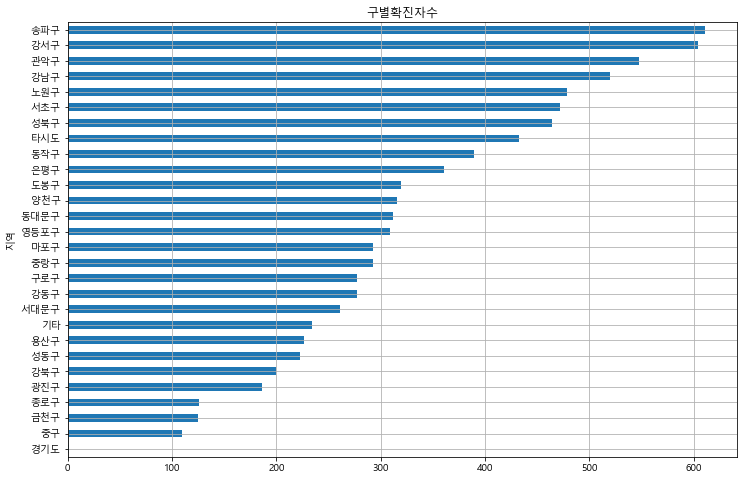

In [47]:
soco_gu['확진'].sort_values().plot(kind='barh', grid=True, figsize=(12,8), title='구별확진자수')
plt.show()

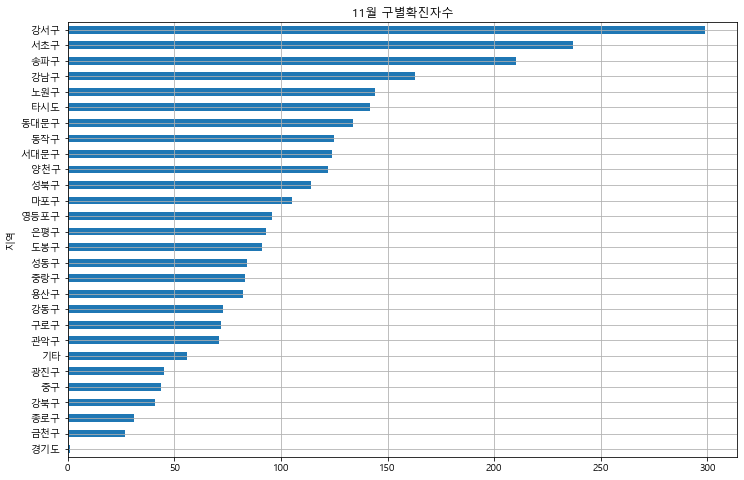

In [48]:
soco_11_g['확진'].sort_values().plot(kind='barh', grid=True, figsize=(12,8), title='11월 구별확진자수')
plt.show()

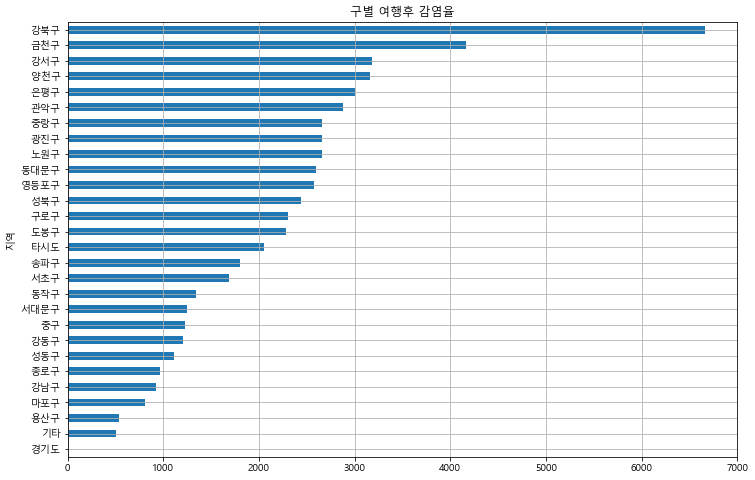

In [49]:
soco_gu01['여행자감염율'].sort_values().plot(kind='barh', grid=True, figsize=(12,8), title='구별 여행후 감염율')
plt.show()

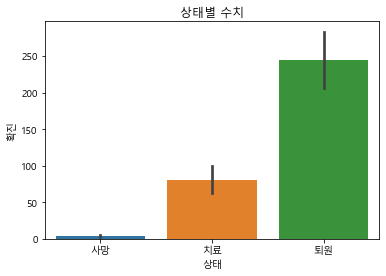

In [50]:
sns.barplot(x="상태", y="확진", data=soco_gu2)
plt.title("상태별 수치")
plt.show()

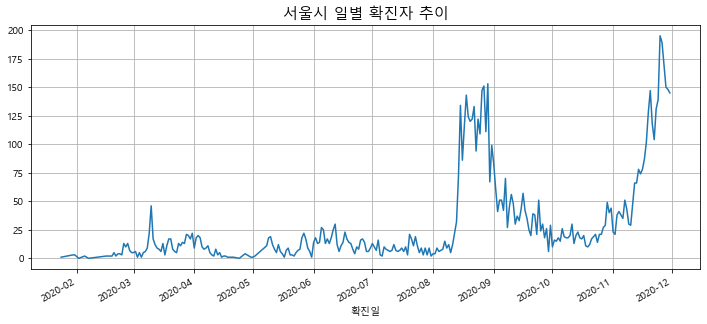

In [51]:
soco_pv1['합계'].plot(grid=True, figsize=(12,5))
plt.title('서울시 일별 확진자 추이', fontsize=15)
plt.show()

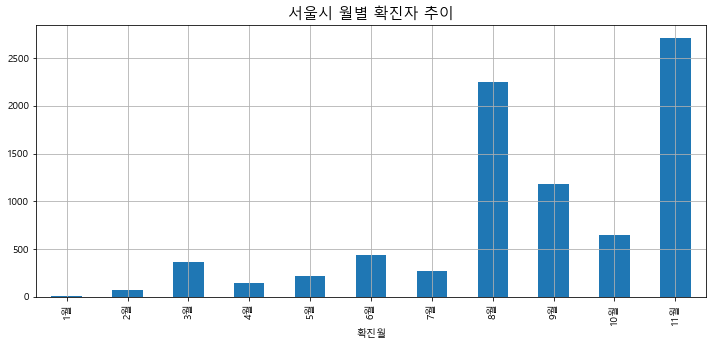

In [52]:
socogo['합계'].plot(kind='bar', grid=True, figsize=(12,5))
plt.xlabel('확진월')
plt.title('서울시 월별 확진자 추이', fontsize=15)
plt.show()

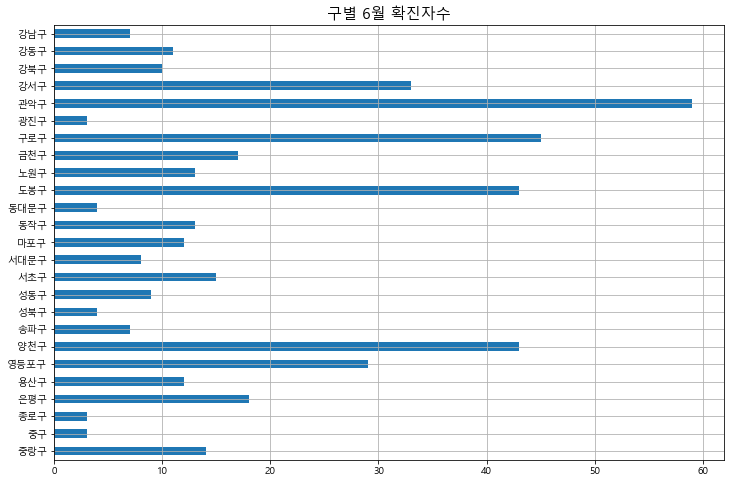

In [53]:
socogo_T['6월'].sort_index(ascending=False).plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구별 6월 확진자수', fontsize=15)
plt.ylabel('')
plt.show()

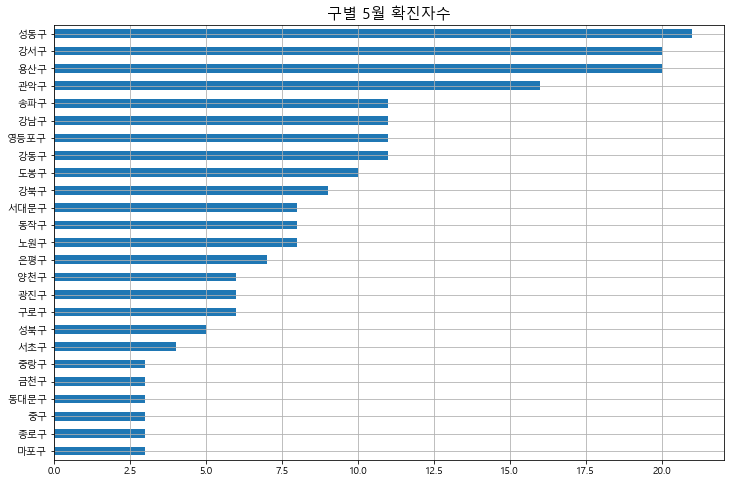

In [54]:
socogo_T['5월'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구별 5월 확진자수', fontsize=15)
plt.ylabel('')
plt.show()

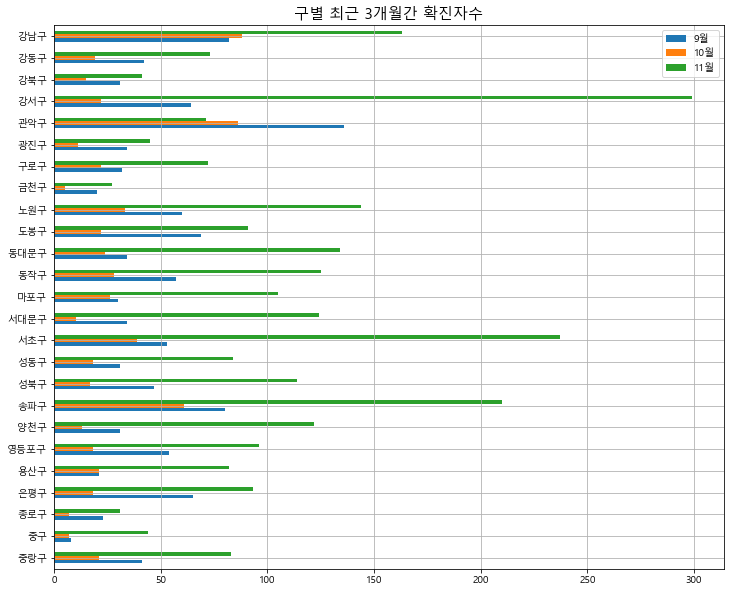

In [55]:
socogo_T[['9월','10월','11월']].sort_index(ascending=False).plot(kind='barh', grid=True, figsize=(12,10))
plt.title('구별 최근 3개월간 확진자수', fontsize=15)
plt.ylabel('')
plt.show()

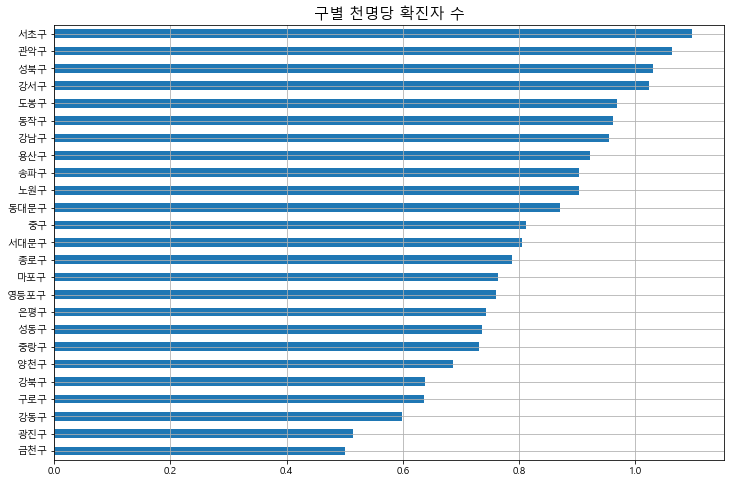

In [56]:
pop_soco['천명당확진자수'].sort_values().plot(kind='barh', grid=True, figsize=(12,8))
plt.title('구별 천명당 확진자 수', fontsize=15)
plt.ylabel('')
plt.show()

In [57]:
import folium
import json
import googlemaps

In [58]:
geo_path = './02. skorea_municipalities_geo_simple.json'
geo_data = json.load(open(geo_path, encoding='utf-8'))

In [59]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)

folium.Choropleth(geo_data = geo_data,
               data = soco_gu['확진'],
               columns = [soco_gu.index, soco_gu['확진']],
               fill_color = 'PuRd',
               key_on = 'feature.id').add_to(map)
               
title_html = '<h3 align="center" style="font-size:20px"><b>서울시 코로나 현황</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map

In [60]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11)
folium.Choropleth(geo_data = geo_data,
               data = pop_soco['천명당확진자수'],
               columns = [pop_soco.index, pop_soco['천명당확진자수']],
               fill_color = 'Accent',
               key_on = 'feature.id').add_to(map)
title_html = '<h3 align="center" style="font-size:20px"><b>천명당 확진자 수</b></h3>'   
map.get_root().html.add_child(folium.Element(title_html))
map